In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
# 0) prepare data for the modle

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)

In [5]:
# Convert numpy data to tnesor
 = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshape y
y = y.view(y.shape[0], 1)

In [6]:
n_samples, n_features = x.shape

In [7]:
# 1) Model

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [12]:
# 2) loss and optimizer

learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [13]:
# 3) training loop

num_iters = 100

for epoch in range(num_iters):
    # prediction = forward pass
    y_pred = model(x)
    
    # loss
    loss = criterion(y_pred, y)
    
    # backward pass and update
    loss.backward()
    optimizer.step()
    
    # zero grad befoe new step
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


epoch: 10, loss = 4028.1577
epoch: 20, loss = 2839.4778
epoch: 30, loss = 2029.1512
epoch: 40, loss = 1476.6323
epoch: 50, loss = 1099.8198
epoch: 60, loss = 842.7847
epoch: 70, loss = 667.4187
epoch: 80, loss = 547.7487
epoch: 90, loss = 466.0705
epoch: 100, loss = 410.3124


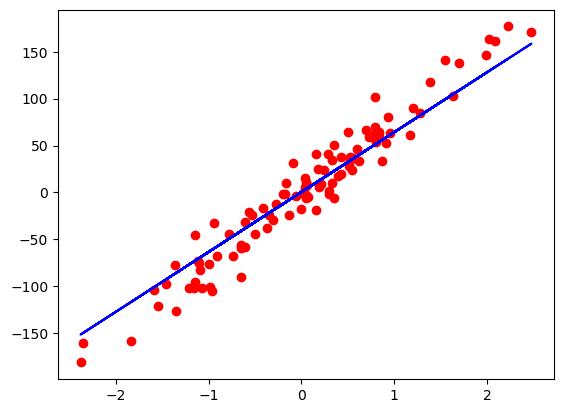

In [15]:
# plot
predicted = model(x).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()